# Predictive Analysis : Predisi Penyakit Jantung

Nama : Nisrina Fatimah Parisya


ID Cohort :MC006D5X1393

## Data Loading

Pada tahapan pertama, saya mengambil dataset dari website Kaggle dengan nama ***common heart disease data 4 hospital*** dan menggunakan library pandas serta menggunakan fungsi` read_csv()` untuk mengunggah dataset yang akan di proses.

Dataset ini terdiri dari 920 baris dan 14 kolom dimana 13 kolom tersebut memiliki tipe data float , 1 kolom integer dan 1 kolom kategorikal.

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("denysskyrda/common-heart-disease-data-4-hospitals")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/common-heart-disease-data-4-hospitals


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

In [ ]:
df = pd.read_csv("/kaggle/input/common-heart-disease-data-4-hospitals/heart_disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,source
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,cleveland
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1,cleveland
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,cleveland
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,cleveland
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,cleveland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,70.0,1.0,4.0,115.0,0.0,0.0,1.0,92.0,1.0,0.0,2.0,1.6,7.0,1,switzerland
916,70.0,1.0,4.0,140.0,0.0,1.0,0.0,157.0,1.0,2.0,2.0,0.8,7.0,1,switzerland
917,72.0,1.0,3.0,160.0,0.0,0.2,2.0,114.0,0.0,1.6,2.0,2.0,6.2,0,switzerland
918,73.0,0.0,3.0,160.0,0.0,0.0,1.0,121.0,0.0,0.0,1.0,1.0,3.0,1,switzerland


## Data Undertanding

Tahapan ini dilakukan untuk memahami isi dataset. hal pertama yang dilakukan adalah memahami dan mengecek isi dari dataset dengan menggunakan` .info() `dan `.describe()`









In [ ]:
# Melihat info dataset untuk mengetahui tipe data setiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    float64
 1   sex       920 non-null    float64
 2   cp        920 non-null    float64
 3   trestbps  920 non-null    float64
 4   chol      920 non-null    float64
 5   fbs       920 non-null    float64
 6   restecg   920 non-null    float64
 7   thalach   920 non-null    float64
 8   exang     920 non-null    float64
 9   oldpeak   920 non-null    float64
 10  slope     920 non-null    float64
 11  ca        920 non-null    float64
 12  thal      920 non-null    float64
 13  target    920 non-null    int64  
 14  source    920 non-null    object 
dtypes: float64(13), int64(1), object(1)
memory usage: 107.9+ KB


In [ ]:
# drop kolom source yang berisi nama RS data penyakit ini diambil, alasannya karena fokus saya disini hanya untuk kebutuhan analisis diagnosis
df = df.drop('source', axis=1)

berdasarkan output tersebut kita dapat mengetahui ada beberapa jenis data


*   12 Kolom dengan tipe data float dengan kategori numerik untuk kolom age, sex, cp, trestbos,chil,cfbs,resrecgh,thalach,exang,oldpeak,slope,ca,thal
*   1 Kolom integer untuk label target dengan nama kolom target yang didalamnya terdapat angka 0 yang artinya pasien tidak memiliki tanda tanda penyakit jantung dan angka 1 yang artinya pasien memiliki tanda tanda penyakit jantung
* 1 Kolom kategorikal dengan data berupa nama rumah sakit dimana data tersebut diambil. Namun karena disini saya berfokus pada prediksi penyakitnya kolom tersebut akan saya hapus

Disini saya akan menerjemahkan terkait dengan apa saja parameter yang terdapat pada setiap kolom dataset

*   age – Usia pasien
*   sex – Jenis kelamin (1 = laki-laki, 0 = perempuan)
* cp – Jenis nyeri dada
* trestbps – Tekanan darah saat istirahat
* chol – Kadar kolesterol dalam darah (mg/dl)
* fbs – Gula darah puasa > 120 mg/dl (1 = ya, 0 = tidak)
* restecg – Hasil elektrokardiogram saat istirahat
* thalach – Detak jantung maksimum yang dicapai
* exang – Angina (nyeri dada) yang dipicu oleh olahraga (1 = ya, 0 = tidak)
* oldpeak – Depresi segmen ST (nilai positif, dibulatkan)
* slope – Kemiringan segmen ST saat latihan
* ca – Jumlah pembuluh darah utama yang terlihat melalui fluoroskopi
* thal – Hasil tes thalassemia
* target – Kehadiran penyakit jantung (1 = ada penyakit, 0 = tidak ada penyakit)





In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000
mean,53.510870,0.789130,3.250000,132.268478,199.640870,0.176304,0.604348,136.889565,0.394783,0.910478,1.757609,0.778913,5.371522,0.553261
std,9.424685,0.408148,0.930969,18.569153,109.240114,0.357484,0.804978,25.438033,0.477178,1.039830,0.539280,0.667765,1.508660,0.497426
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,177.000000,0.000000,0.000000,120.000000,0.000000,0.000000,1.200000,0.200000,3.800000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,223.000000,0.000000,0.000000,138.000000,0.000000,0.600000,2.000000,0.800000,6.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.200000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


pada df.describe() disini kita dapat mengecek isi data secara statistik deskriptif dan menganalisis apakah ada kemungkinan kesalahan data. dari iyang kita lihat diatas ada beberapa kemungkinan data yang mengalami outlier diantaranya


*   trestbps (tekanan darah) : alasannya karena tekanan darah di nilai 0 pada kolom min sangat tidak normal dalam medis
*   chol (kolesterol) : alasannya karena kolesterol berada di nilai 0 pada kolom min sangat tidak normal dalam medis



#### Handling Missing Value

pada tahapan ini kita dapat melakukan pengecekan missing value dalam dataset tersebut diantaranya menggunakan funsgi .`isnull().sum()` untuk mengetahui missing value di setiap kolom

In [ ]:
# Jumlah nilai yang hilang per kolom
missing_values = df.isnull().sum()
print("Cek Missing Value:")
print(missing_values)

Cek Missing Value:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


Berdasarkan output diatas tidak ditemukan adanya missing value, maka dari itu kita tidak perlu melakukan eksekusi drop atau mengisi nilai NaN pada data karena semua data terisi dengan baik

#### Handling Outlier

Berdasarkan hasil statistik deskriptif sebelumnya saya merasa ada beberapa outliers yang harus ditangani. pada proses ini saya mengganti nilai outlier dengan metode *IQR+Median Replacement* agar tidak mengurangi data secara ekstrim

<Axes: xlabel='trestbps'>

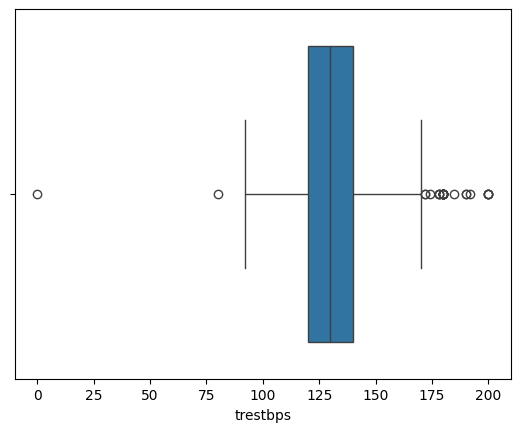

In [ ]:
sns.boxplot(x=df['trestbps'])

<Axes: xlabel='chol'>

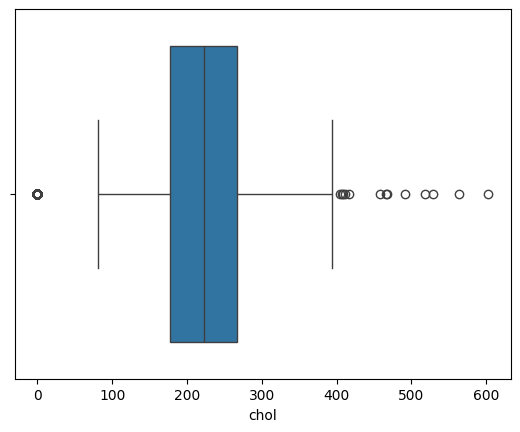

In [ ]:
sns.boxplot(x=df['chol'])


Statistik deskriptif setelah penanganan outlier:
         trestbps        chol
count  920.000000  920.000000
mean   130.954348  237.802826
std     15.658730   44.888656
min     92.000000   80.600000
25%    120.000000  216.000000
50%    130.000000  223.000000
75%    140.000000  264.000000
max    170.000000  394.000000


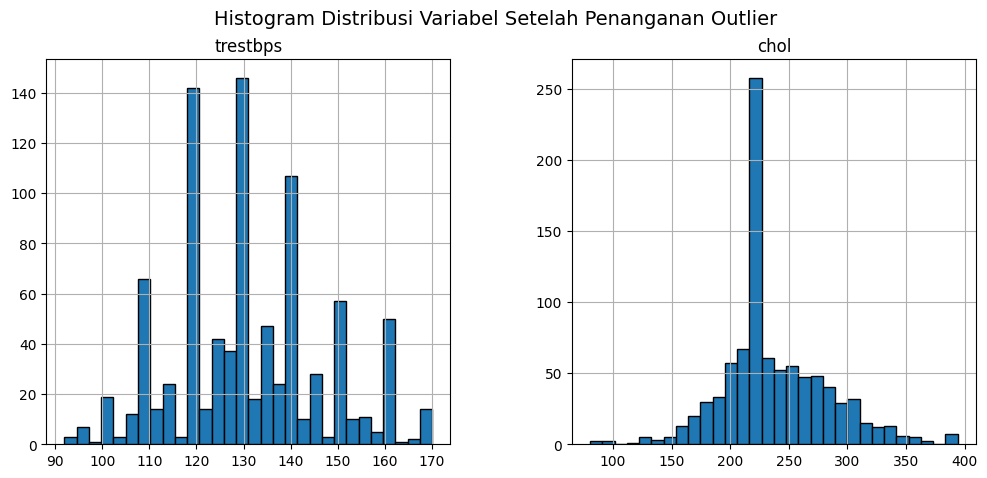

In [ ]:
import matplotlib.pyplot as plt
outlier_cols = ['trestbps', 'chol']

for col in outlier_cols:
    # Hitung kuartil pertama (Q1) dan kuartil ketiga (Q3)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Tentukan batas bawah dan batas atas untuk outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Hitung median kolom
    median_val = df[col].median()

    # Ganti outlier dengan median
    df[col] = df[col].apply(lambda x: median_val if x < lower_bound or x > upper_bound else x)

print("\nStatistik deskriptif setelah penanganan outlier:")
print(df[outlier_cols].describe())

# Visualisasi data setelah penanganan outlier (opsional)
df[outlier_cols].hist(figsize=(12, 5), bins=30, edgecolor='black')
plt.suptitle("Histogram Distribusi Variabel Setelah Penanganan Outlier", fontsize=14)
plt.show()

##### Handling Duplicate Data

Pada tahapan ini kita dapat melakukan pengecekan duplikasi data dengan df.`duplicated().sum(). `Setelah melakukan pengecekan ternyata terdapat data yang mengalami duplikasi sebanyak 2 duplikasi sehingga program menghapus data yang duplikat dengan` .drop_duplicates()` dan jumlah data sekatang menjadi 918 baris.

In [ ]:
# cek duplikasi data
print("Cek Duplikasi Data:")
print(f"Jumlah duplikasi data sebelum dihapus: {df.duplicated().sum()}")

# Hapus duplikasi data
df = df.drop_duplicates()

print(f"Jumlah duplikasi data setelah dihapus: {df.duplicated().sum()}")

# Cek ukuran data setelah menghapus duplikasi
print(f"Jumlah baris data setelah menghapus duplikasi: {len(df)}")

Cek Duplikasi Data:
Jumlah duplikasi data sebelum dihapus: 2
Jumlah duplikasi data setelah dihapus: 0
Jumlah baris data setelah menghapus duplikasi: 918


##### Bagi pengelompokan jenis data

pada tahapan ini saya mengecek tipe data terhadap kolom yang akan di gunakan untuk permodelan, disini saya menggunakan `df.select_dtypes(include=['number']).columns.tolist()` dan `df.select_dtypes(include=['object']).columns.tolist()`. dapat dilihat pada output dibawah kode tersebut apa saja kolom dengan tipe data numerik. dan untuk kolom kategorikal kosong karena pada dataset memang hanya membutuhkan kolom numerikal untuk proses

In [ ]:
# Mengecek tipe data setiap kolom dan mengelompokkannya
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Kolom Numerikal:")
print(numerical_cols)
print("\nKolom Kategorikal:")
categorical_cols

Kolom Numerikal:
['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

Kolom Kategorikal:


[]

#### Visualisasi Data

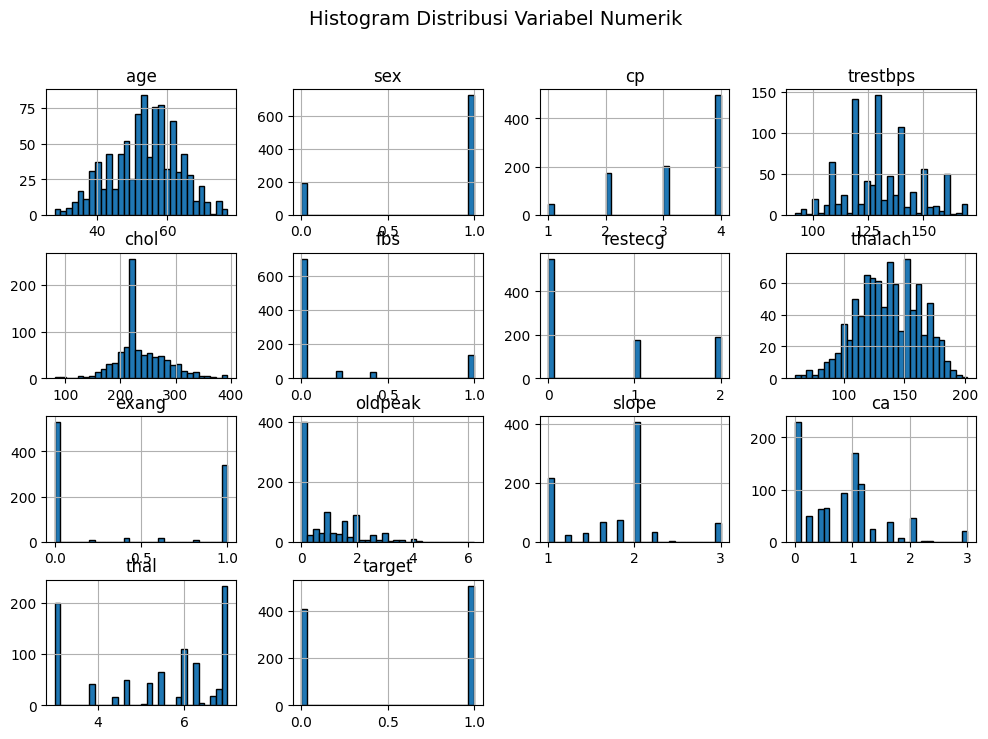

In [ ]:
numeric_data =df.select_dtypes(include=['float64', 'int64'])
numeric_data.hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Histogram Distribusi Variabel Numerik", fontsize=14)
plt.show()

Berdasarkan output histogram dari masing masing variabel kita bisa mendapatkan beberapa informasi diantaranya


*   Kita sudah memiliki label "target" untuk menandakan penyakit pasien dengan angka 0 yang artinya tidak memiliki penyakit jantung dan 1 yang artinya memuliki penyakit jantung
*   Mayoritas data numerik menunjukkan distribusi yang mendekati normal
* Terdapat beberapa variabel yang menunjukkan distribusi miring kanan sehingga kemungkinan akan berimplikasi pada model yang telah dibuat



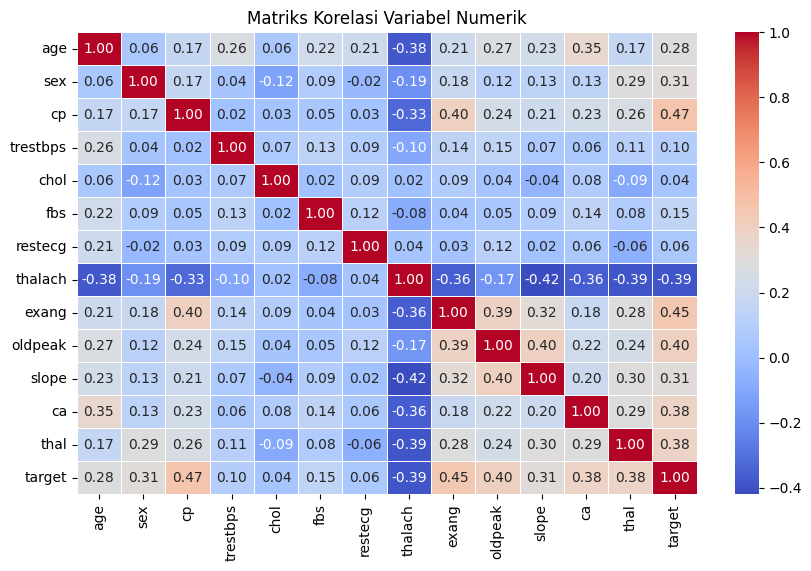

In [ ]:
# Analisis Korelasi
plt.figure(figsize=(10, 6))
correlation_matrix = numeric_data.corr().round(2)

# Heatmap korelasi
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriks Korelasi Variabel Numerik")
plt.show()

Hasil Correlation Map diatas beberikan beberapa informasi yaitu


*   Fitur yang sangat berkorelasi dengan label target adalah cp (nyeri dada), exang (nyeri dada saat berolahraga), oldpeak, thal (hasil tes thalassemia) dan ca (jumlah pembuluh darah)
*   Pada hasil tersebut dapat dilihat bahwa jenis kelamin laki laki (sex=1) memiliki resiko penyakit jantung yang lebih tinggi dibandingkan perempuan



## Data Preparation

Tahapan ini merupakan tahapan sebelum memasuki permodelan. Langkah yang saya lakukan diantaranya :
* Karena data yang saya gunakan disini sudah berformat numerik dan sudah terdapat label pada data maka saya tidak melakukan Label Encoding.
* Disini saya membagi dataset menjadi data latih (train) sebesar 80% dan data uji (testing) sebesar 20%

In [ ]:
# Bagi dataset menjadi training (80%) dan testing (20%)
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Cek ukuran data
print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")

Training set: (734, 13), Testing set: (184, 13)


Langkah kedua pada tahapan ini saya melakukan normalisasi menggunakan `StandardScaler()` dengan tujuan meningkatkan hasil prediksi lebih akurat dan stabil



In [ ]:
# normalisasi
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Langkah berikutnya saya membuat kolom label kategorikal untuk identifikasi prediksi penyakit jantung

In [ ]:
# Mapping nilai target ke label
df['target_label'] = df['target'].map({1: 'Mengidap Penyakit Jantung', 0: 'Tidak Mengidap Penyakit Jantung'})

# Menampilkan jumlah data berdasarkan label target
df['target_label'].value_counts()

,count
target_label,
Mengidap Penyakit Jantung,508
Tidak Mengidap Penyakit Jantung,410


<ipython-input-18-549dd4452f3c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target_label', data=df, palette='viridis')


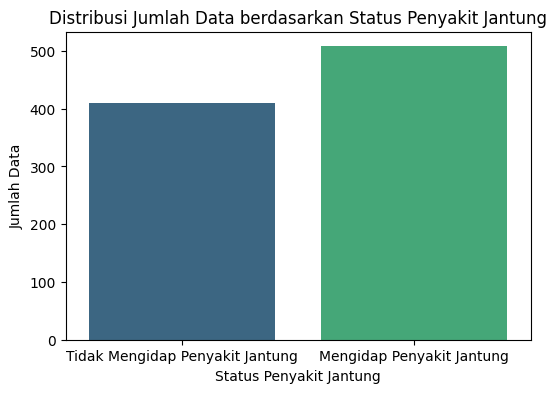

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
sns.countplot(x='target_label', data=df, palette='viridis')
plt.title('Distribusi Jumlah Data berdasarkan Status Penyakit Jantung')
plt.xlabel('Status Penyakit Jantung')
plt.ylabel('Jumlah Data')
plt.show()

## Model Development

Pada tahapan modeling disini saya menggunakan tiga model machine learning untuk pengujian dataset ini yaitu :


1. Random Forest Classification
2. Logistic Regression
3. K-Nearest Neighbor (KNN)




###Random Forest

Pada permodelan ini yang saya lakukan adalah :
* Memanfaatkan library sklearn dan
*   Menggunakan fungsi `RandomForestClassifier()`
* Parameteer yang digunakan adalah `random_state=42` yang artinya membuat model dengan random seed agar hasil yang diharapkan bisa konsiste


In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Inisialisasi dan latih model Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Prediksi
y_pred_dt = rf_model.predict(X_test)

###Logistic Regression

Pada permodelan ini yang saya lakukan adalah :
* Memanfaatkan library sklearn dan
*   Menggunakan fungsi `LogisticRegression()`
* Parameteer yang digunakan adalah random_state=42 yang artinya membuat model dengan random seed agar hasil yang diharapkan bisa konsisten


In [ ]:
from sklearn.linear_model import LogisticRegression
# Inisialisasi dan latih model Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

# Prediksi
y_pred_lr = lr_model.predict(X_test)

 K-Nearest Neighbors

Pada permodelan ini yang saya lakukan adalah :
* Memanfaatkan library scikit-learn dan
*   Menggunakan fungsi `KNeighborsClassifier() dengan parameter default yang nantinya disimpan ke variabel knn_model


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Inisialisasi dan latih model KNN
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

# Prediksi
y_pred_knn = knn_model.predict(X_test)

## Evaluation

Evaluasi model yang dilakukan untuk prediksi data ini menggunakan metrik Akurasi dan F1-Score.

Berdasarkan hasil analisis yang didapatkan dari ketiga model tersebut masing masing model memiliki akurasi serta F1 score yang tinggi dan sangat baik dalam memprediksi dataset perbedaan dan penjelasan untuk masing masing permodelan, dari semua proses yang didapatkan terdapat beberapa kesimpulan diantaranya :     

1. Random Forest
* Akurasi dan F1-Score stabil di angka 0.81
*  Memprediksi pasien yang tidak sakit sebagai sakit (false positive)

2. Logistic Regression
* Memiliki akurasi dan F1-score tertinggi di angka 0.83
* Model yang memprediksi paling baik karena memiliki recall di angka 0.87

3. KNN
* Akurasi dan F1-Score di angka yang cukup bagus yaitu 0.82 dan F1 Score 0.81
* Recall yang tinggi sehingga bagus untuk melakukan prediksi

Random Forest

In [ ]:
# Evaluasi Model Random Forest
rf_y_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_f1 = f1_score(y_test, rf_y_pred, average='weighted')
rf_report = classification_report(y_test, rf_y_pred, zero_division=1)
rf_conf_matrix = confusion_matrix(y_test, rf_y_pred)

print("\n=== Random Forest ===")
print(f'Accuracy: {rf_accuracy}')
print(f'Weighted F1-Score: {rf_f1}')
print('Classification Report:\n', rf_report)


=== Random Forest ===
Accuracy: 0.8369565217391305
Weighted F1-Score: 0.8364862040133779
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.79      0.81        82
           1       0.84      0.87      0.86       102

    accuracy                           0.84       184
   macro avg       0.84      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184



Logistic Regression

In [ ]:
# Evaluasi Model Logistic Regression
lr_y_pred = lr_model.predict(X_test)
lr_accuracy = accuracy_score(y_test, lr_y_pred)
lr_f1 = f1_score(y_test, lr_y_pred, average='weighted')
lr_report = classification_report(y_test, lr_y_pred, zero_division=1)
lr_conf_matrix = confusion_matrix(y_test, lr_y_pred)

print("\n=== Logistic Regression ===")
print(f'Accuracy: {lr_accuracy}')
print(f'Weighted F1-Score: {lr_f1}')
print('Classification Report:\n', lr_report)


=== Logistic Regression ===
Accuracy: 0.8315217391304348
Weighted F1-Score: 0.8308880000732685
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.78      0.81        82
           1       0.83      0.87      0.85       102

    accuracy                           0.83       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.83      0.83      0.83       184



K-Nearest Neighbours

In [ ]:
# Evaluasi Model KNN
knn_y_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_y_pred)
knn_f1 = f1_score(y_test, knn_y_pred, average='weighted')
knn_report = classification_report(y_test, knn_y_pred, zero_division=1)
knn_conf_matrix = confusion_matrix(y_test, knn_y_pred)

print("=== KNN ===")
print(f'Accuracy: {knn_accuracy}')
print(f'Weighted F1-Score: {knn_f1}')
print('Classification Report:\n', knn_report)

=== KNN ===
Accuracy: 0.8152173913043478
Weighted F1-Score: 0.814684364548495
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.77      0.79        82
           1       0.82      0.85      0.84       102

    accuracy                           0.82       184
   macro avg       0.81      0.81      0.81       184
weighted avg       0.81      0.82      0.81       184



Barplot Accuracy dan F1 Score


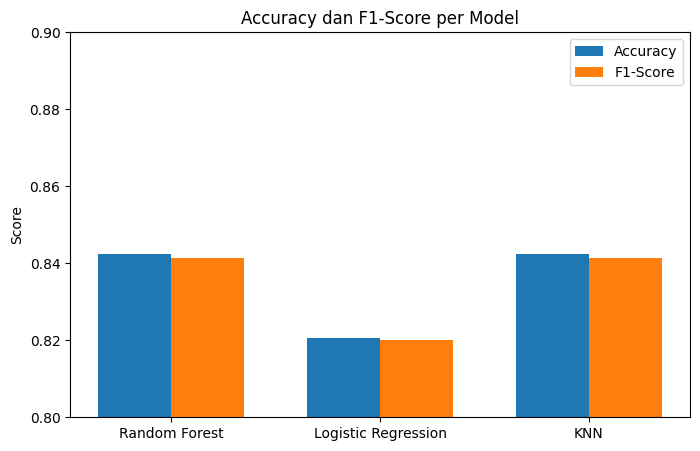

In [ ]:
import numpy as np

models = ['Random Forest', 'Logistic Regression', 'KNN']
accuracies = [0.8424, 0.8207, 0.8424]
f1_scores = [0.8415, 0.8200, 0.8415]

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots(figsize=(8,5))
ax.bar(x - width/2, accuracies, width, label='Accuracy')
ax.bar(x + width/2, f1_scores, width, label='F1-Score')

ax.set_ylabel('Score')
ax.set_title('Accuracy dan F1-Score per Model')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
plt.ylim(0.8, 0.9)
plt.show()


Confussion Matrix

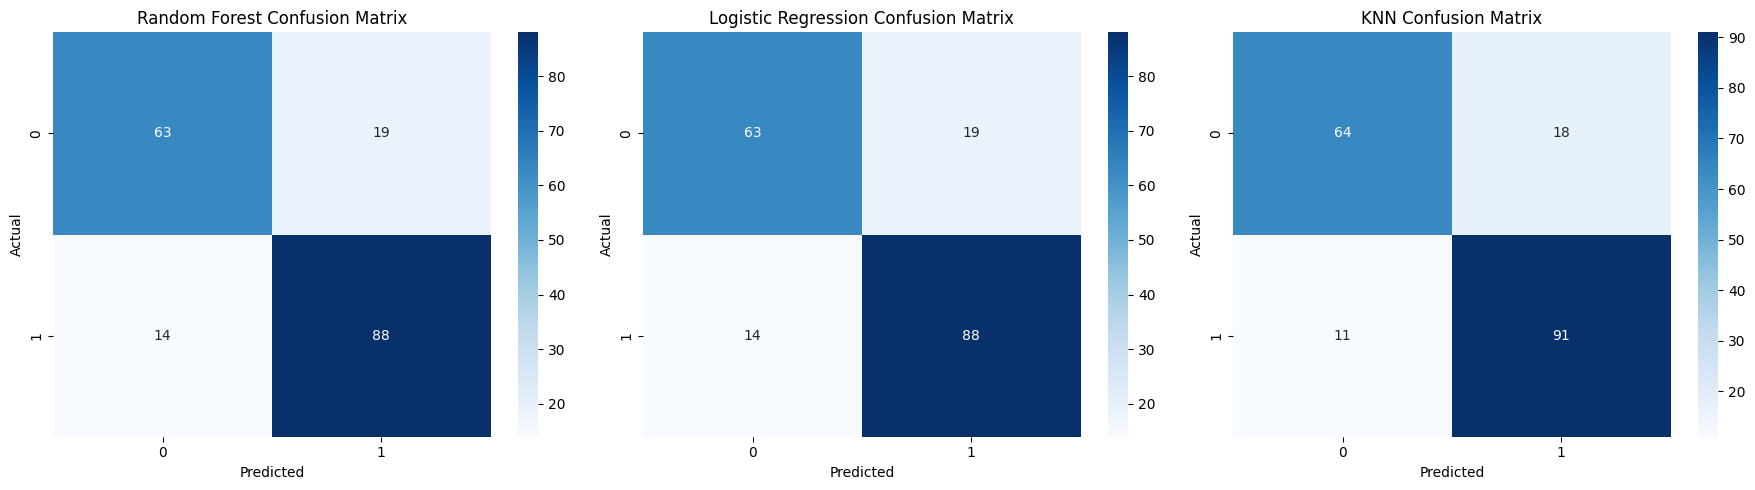

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion matrix untuk masing-masing model
cm_rf = [[63, 19], [14, 88]]
cm_lr = [[63, 19], [14, 88]]
cm_knn = [[64, 18], [11, 91]]

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, (cm, title) in enumerate(zip([cm_rf, cm_lr, cm_knn],
                                    ['Random Forest', 'Logistic Regression', 'KNN'])):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'{title} Confusion Matrix')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

plt.tight_layout()
plt.show()


Hasil dari Confusion Matrix diatas memberikan beberapa pemaparan diantaranya
1. Random Forest & Logistic Regression
Keduanya memiliki jumlah prediksi yang sama persis yaitu
* 88 pasien sakit terdeteksi dengan benar (TP)
* 63 pasien sehat terdeteksi dengan benar (TN)
* 14 pasien sakit tidak terdeteksi (FN)
* 19 pasien sehat diidentifikasi sakit (FP)

2. K-Nearest Neighbors (KNN)
* TP meningkat menjadi 91 (berhasil mendeteksi 3 pasien sakit lebih banyak).
* FP sedikit berkurang dari 19 menjadi 18.

#### Kesimpulan Akhir

Kesimpulannya dari keseluruhan model, yang paling bagus untuk di terapkan pada dataset ini adalah model dengan Random Forest karena memiliki akurasi dan F1-Score yang tinggi dengan Skor Accuracy (0.8369) dan F1-Score (0.8364). Namun jika itu diambil berdasarkan Confussion Matrix maka dalam meminimalisir deteksi pasien lebih akurat disarankan menggunakan KNN karena model KNN memberikan performa yang baik dan mengurangi False Negatif